plotting the distance dependence of the Cramer's V. the distance on genome in kilo base pairs

In [47]:
 ## imports
import numpy as np
import networkx as nx
import scipy.stats as stats
import pandas as pd
import sklearn as sk
import itertools
import os
from matplotlib import pyplot as plt 
from bed_reader import open_bed
from IPython.display import SVG
from sknetwork.embedding import LouvainNE
from sknetwork.embedding import LouvainEmbedding
from sknetwork.visualization import svg_graph, svg_bigraph
from networkx.algorithms import bipartite
from networkx.algorithms import community
from scipy import sparse
from sknetwork.hierarchy import LouvainHierarchy
from sknetwork.hierarchy import cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_bigraph, svg_dendrogram
from sklearn.neighbors import NearestNeighbors
from scipy.stats import chi2_contingency
from scipy.sparse import diags

In [48]:
# get cramer's matrix
arr = np.loadtxt("chrom19cramer100.csv",
                 delimiter=",", dtype=np.float64) # chromosome 19, every 100 SNP
# get triangle
triangle = np.triu(arr, k=1) # get upper half
triangleSparse = sparse.csr_matrix(triangle)
triangle

array([[0.        , 0.38810293, 0.24109313, ..., 0.45753968, 0.14245742,
        0.36877027],
       [0.        , 0.        , 0.22561113, ..., 0.38810293, 0.17709782,
        0.30846984],
       [0.        , 0.        , 0.        , ..., 0.24109313, 0.06528576,
        0.19743985],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.14245742,
        0.36877027],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10534386],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
'''
calculating distance between genomes:
- a short distance means the genomes/species are more closely related

'''

'\ncalculating distance between genomes:\n- a short distance means the genomes/species are more closely related\n\n'

In [50]:
from pairsnp import calculate_snp_matrix, calculate_distance_matrix
from fasta import FASTA
file_name = '/Users/rishasurana/Library/CloudStorage/GoogleDrive-rsurana@usc.edu/.shortcut-targets-by-id/1I-Ssaub3M29w33JyrvO7HVv9laffGidc/chromosome_17_bed_bim_fam_data/ukb22418_c19_b0_v2.bed'


In [51]:
def calculate_distance_matrix(sparse_matrix, type, inc_n):

    n_seqs = sparse_matrix.shape[0]

    d = (1*(sparse_matrix==97)) * (sparse_matrix.transpose()==97)
    d = d + (1*(sparse_matrix==99) * (sparse_matrix.transpose()==99))
    d = d + (1*(sparse_matrix==103) * (sparse_matrix.transpose()==103))
    d = d + (1*(sparse_matrix==116) * (sparse_matrix.transpose()==116))

    d = d.todense()

    if(type=="dist"):
        temp_sparse_n = sparse_matrix==110
        n_comp = (1*temp_sparse_n * (temp_sparse_n.transpose())).todense()
        d = d + n_comp
        temp_total = np.zeros((n_seqs, n_seqs))
        seq_sum = (1*(sparse_matrix>0)).sum(1)
        temp_total[:] = seq_sum
        total_differences_shared = (1*(sparse_matrix>0)) * (sparse_matrix.transpose()>0)

        if inc_n:
            d = temp_total + np.transpose(temp_total) - total_differences_shared.todense() - d
        else:
            n_total = np.zeros((n_seqs, n_seqs))
            n_sum = (1*temp_sparse_n).sum(1)
            n_total[:] = n_sum
            
            '''
            if(sum(consensus==110)<=0):
                tot_cons_snps_N = cons_snps_N = 0
            else:
                matrix_n_cols = 1*(sparse_matrix>0)[:,consensus==110]
                cons_snps_N = matrix_n_cols * np.transpose(matrix_n_cols)

                tot_cons_snps_N = np.zeros((n_seqs, n_seqs))
                tot_cons_snps_N_sum = matrix_n_cols.sum(1)
                tot_cons_snps_N[:] = tot_cons_snps_N_sum
            diff_n = n_total + np.transpose(n_total) - 2*n_comp + tot_cons_snps_N + np.transpose(tot_cons_snps_N) - 2*cons_snps_N
            d = temp_total + np.transpose(temp_total) - total_differences_shared.todense() - d - diff_n
            '''
            

    return d

In [63]:
d = calculate_distance_matrix(triangleSparse, "dist", True)
distance = np.asarray(d)
distance

array([[258., 258., 258., ..., 258., 258., 258.],
       [258., 257., 257., ..., 257., 257., 257.],
       [258., 257., 256., ..., 256., 256., 256.],
       ...,
       [258., 257., 256., ...,   2.,   2.,   2.],
       [258., 257., 256., ...,   2.,   1.,   1.],
       [258., 257., 256., ...,   2.,   1.,   0.]])

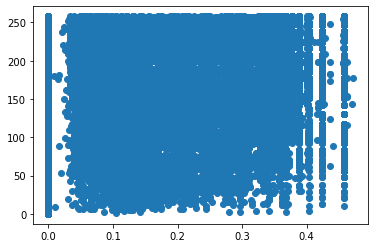

In [67]:
# plot
x = triangle
y = distance

fig, ax = plt.subplots()

ax.scatter(x, y)

plt.show()